## Wrangle and Analyze Data


## Table of Contents
- [Part I - Gathering Data](#Gather)

   1. Download the WeRateDogs Twitter archive by using twitter_archive_enhanced.csv
   
   2. Download the tweet image predictions from image_predictions.tsv (https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv). The mage_predictions.tsv is hosted on Udacity's servers. 
   
   3. Use the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.


- [Part II - Assessing Data](#Assess)

   1. Assess the data visually and programmatically 
   
   2. Detect and document at least eight quality issues and two tidiness issues
 
 
- [Part III - Cleaning Data](#Clean)

   1. Clean each of the issues that documented in assessing part


- [Part IV - Storing, Analyzing, and Visualizing Data](#SAV)

   1. Store the clean DataFrame in a CSV file called twitter_archive_master.csv
   
   2. Solve following questions: 
      - What's the common dog stage? 
      - Which dog stage has highest rating?
      - What's the top 10 dog's name? 
      - What's the relationship between tweet count and favourite count? 
      - Which month has most retweet and like? 
      
      
- [References](#REF) 
    


<a id='intro'></a>
### Introduction

<a id='Gather'></a>
### Part I - Gathering Data

In [1]:
import pandas as pd
import numpy as np
import requests
import os


In [2]:
# Load the twitter-archive-enhanced csv file into DataFrame

archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Download the image prediction file from Udacity's servers

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
#Save HTML to file
with open(url.split('/')[-1],mode ='wb') as file:
    file.write(response.content)
   


In [4]:
# Load image prediction file into DataFrame
prediction = pd.read_csv('image-predictions.tsv', sep = '\t')
prediction.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
# Set up Twitter's API 
import tweepy
consumer_key = 'RETWEET KEY'
consumer_secret = 'RETWEET SECRET'
access_token = 'RETWEET TOKEN'
access_secret = 'RETWEET SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit = True, wait_on_rate_limit_notify=True)

In [6]:
# Use Twitter API to collect status data on tweets present 
import timeit
count = 0
start = timeit.timeit()

tweets_data =[]
id_missing = []

for tweet_id in archive['tweet_id']: 
    try:
        tweets_data.append(api.get_status(tweet_id, tweet_mode='extended'))
        print(str(tweet_id))                  
    except Exception as e: 
        id_missing.append(tweet_id)
        print(str(tweet_id) + ":" + str(e)) 
        count += 1                   
end = timeit.timeit()
print(count)
print(end - start)

892420643555336193:[{'code': 89, 'message': 'Invalid or expired token.'}]
892177421306343426:[{'code': 89, 'message': 'Invalid or expired token.'}]
891815181378084864:[{'code': 89, 'message': 'Invalid or expired token.'}]
891689557279858688:[{'code': 89, 'message': 'Invalid or expired token.'}]
891327558926688256:[{'code': 89, 'message': 'Invalid or expired token.'}]
891087950875897856:[{'code': 89, 'message': 'Invalid or expired token.'}]
890971913173991426:[{'code': 89, 'message': 'Invalid or expired token.'}]
890729181411237888:[{'code': 89, 'message': 'Invalid or expired token.'}]
890609185150312448:[{'code': 89, 'message': 'Invalid or expired token.'}]
890240255349198849:[{'code': 89, 'message': 'Invalid or expired token.'}]
890006608113172480:[{'code': 89, 'message': 'Invalid or expired token.'}]
889880896479866881:[{'code': 89, 'message': 'Invalid or expired token.'}]
889665388333682689:[{'code': 89, 'message': 'Invalid or expired token.'}]
889638837579907072:[{'code': 89, 'mess

In [7]:
import json

tweet_json = pd.DataFrame(columns=['tweet_id','favorite_count', 'retweet_count'])
with open('tweet-json.txt') as json_file:
    for line in json_file:
        tweet = json.loads(line)
        tweet_id = tweet['id_str']
        favorite_count = tweet['favorite_count']
        retweet_count = tweet['retweet_count']
        tweet_json = tweet_json.append(pd.DataFrame([[tweet_id,favorite_count, retweet_count]],
                                        columns=['tweet_id','favorite_count', 'retweet_count']))
        
        tweet_json = tweet_json.reset_index(drop=True)


<a id='Assess'></a>
### Part II - Assessing Data

In [8]:
#Display the archive table
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
archive.describe

<bound method NDFrame.describe of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689      

In [10]:
archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
archive.tweet_id.duplicated().sum()

0

In [12]:
archive.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Lucy             11
Cooper           11
Tucker           10
Lola             10
Penny            10
Winston           9
Bo                9
the               8
Sadie             8
Buddy             7
Toby              7
an                7
Bailey            7
Daisy             7
Stanley           6
Jack              6
Oscar             6
Dave              6
Rusty             6
Koda              6
Jax               6
Milo              6
Bella             6
Leo               6
Scout             6
Sunny             5
               ... 
Jeremy            1
Pherb             1
Asher             1
Bronte            1
Tom               1
Ferg              1
Mac               1
Roscoe            1
Brandonald        1
Mack              1
Cleopatricia      1
Combo             1
Sunshine          1
Evy               1
Brownie           1
Rhino             1
Tommy             1
Izzy              1
Kallie            1


In [13]:
#Display the Prediction  table
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
prediction.describe

<bound method NDFrame.describe of                 tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221

In [15]:
prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [16]:
prediction.tweet_id.duplicated().sum()

0

In [17]:
prediction.jpg_url.duplicated().sum()

66

In [18]:
#Display the Prediction  table
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null object
retweet_count     2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [19]:
tweet_json.describe

<bound method NDFrame.describe of                 tweet_id favorite_count retweet_count
0     892420643555336193          39467          8853
1     892177421306343426          33819          6514
2     891815181378084864          25461          4328
3     891689557279858688          42908          8964
4     891327558926688256          41048          9774
5     891087950875897856          20562          3261
6     890971913173991426          12041          2158
7     890729181411237888          56848         16716
8     890609185150312448          28226          4429
9     890240255349198849          32467          7711
10    890006608113172480          31166          7624
11    889880896479866881          28268          5156
12    889665388333682689          38818          8538
13    889638837579907072          27672          4735
14    889531135344209921          15359          2321
15    889278841981685760          25652          5637
16    888917238123831296          29611         

In [20]:
tweet_json.isnull().sum()

tweet_id          0
favorite_count    0
retweet_count     0
dtype: int64

In [21]:
tweet_json.tweet_id.duplicated().sum()

0

In [22]:
all_columns = pd.Series(list(archive)+list(prediction)+list(tweet_json))
all_columns[all_columns.duplicated()]


17    tweet_id
29    tweet_id
dtype: object

### Quality  Issues
##### 'archive' table
- Tweet_id is an int 
- The dataset included retweets, which means it included duplicated data like retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
- timestamp is an object 
- Missing one column for the rating instead of rating_numerator and rating_denominator
- There are missing data in the columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls
- Dogs' name has  a, the, this or an
- Lowercase given Dogs' name 
- The source column’s content are not clear



##### 'Prediction' table
- tweet_id is an int
- The column jpg_url has 66 duplicated data
- The first letter of the column p1,p2,p3 some lowercase, some uppercase, and the symbol connect word are nor consistent  




### Tidiness Issues
##### 'archive' table
- The variable for dog stage is in four  different columns (dogoo, pupper, puppo) 

##### 'prediction' table
- This dataset has part of the same observation in the archive table

##### 'tweet_json' table
- This dataset has part of the same observation in the archive table

<a id='Clean'></a>
### Part III - Cleanning Data

In [23]:
# Copying DataFrame in Pandas is done using the copy method. 
archive_clean = archive.copy()
prediction_clean = prediction.copy()
tweet_json_clean = tweet_json.copy()

#### Define
##### Convert tweet_id column's data type from an int to a string using astype

#### Code

In [24]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
prediction_clean.tweet_id = prediction_clean.tweet_id.astype(str)


#### Test

In [25]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [26]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define
##### Drop jpg_url duplicated data

#### Code

In [27]:
prediction_clean.jpg_url.duplicated().sum()

66

In [28]:
# Select duplicate rows except first occurrence based on all columns
duplicated = prediction_clean.jpg_url[prediction_clean.jpg_url.duplicated()]
duplicated

1297    https://pbs.twimg.com/ext_tw_video_thumb/67535...
1315      https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg
1333      https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg
1345      https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg
1349      https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg
1364    https://pbs.twimg.com/tweet_video_thumb/CeBym7...
1368      https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg
1387      https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg
1407      https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg
1417      https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg
1427      https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg
1446      https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg
1453      https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg
1456      https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg
1463      https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg
1476      https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg
1487      https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg
1495      http

In [29]:
#Drop duplicted rows
prediction_clean = prediction_clean.drop_duplicates(subset='jpg_url', keep="first")


#### Test

In [30]:
prediction_clean.jpg_url.duplicated().sum()

0

In [31]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


#### Define
##### Merge archive table, prediction table and tweet_json table, joining on tweet_id 

#### Code

In [32]:
archive_clean = archive_clean.merge(prediction_clean,on='tweet_id').merge(tweet_json_clean,on='tweet_id')


In [33]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774


In [34]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2007
Data columns (total 30 columns):
tweet_id                      2008 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2008 non-null object
source                        2008 non-null object
text                          2008 non-null object
retweeted_status_id           14 non-null float64
retweeted_status_user_id      14 non-null float64
retweeted_status_timestamp    14 non-null object
expanded_urls                 2008 non-null object
rating_numerator              2008 non-null int64
rating_denominator            2008 non-null int64
name                          2008 non-null object
doggo                         2008 non-null object
floofer                       2008 non-null object
pupper                        2008 non-null object
puppo                         2008 non-null object
jpg_url                       2008

#### Define
##### Remove Retweets data

#### Code

In [35]:
#Keep rows when retweeted_status_id is NaN
archive_clean = archive_clean[pd.isnull(archive_clean['retweeted_status_id'])]

#Remove retweeted_status_id, retweeted_status_user_id and 
#retweeted_status_timestamp columns

archive_clean = archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis = 1)



#### Test

In [36]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2007
Data columns (total 27 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       

#### Define
##### Convert timestamp to datetime data type

#### Code

In [37]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)


#### Test

In [38]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2007
Data columns (total 27 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2               

In [39]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774


#### Define
##### Remove the doggo, floofer, pupper and puppo from archive table. These are dog stages

#### Code

In [40]:
archive_clean.doggo = archive_clean.doggo.astype(str)
archive_clean.floofer = archive_clean.floofer.astype(str)
archive_clean.pupper = archive_clean.pupper.astype(str)
archive_clean.puppo = archive_clean.puppo.astype(str)
archive_clean['dog_stage'] = archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)',expand=True)
archive_clean = archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1)
archive_clean['dog_stage'] = archive_clean['dog_stage'].replace(np.nan,'None', regex=True)




#### Test

In [41]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2007
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null bool
p3                       1994 non-null object
p3_conf           

In [42]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,bagel,0.085851,False,banana,0.076110,False,39467,8853,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774,None


#### Define
###### Calculate rating by using rating_numerator/rating_denominator


#### Code

In [43]:
archive_clean['rating']= archive_clean['rating_numerator']/archive_clean['rating_denominator']


#### Test

In [44]:
archive_clean['rating']

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
5       1.3
6       1.3
7       1.3
8       1.3
9       1.4
10      1.3
11      1.3
12      1.3
13      1.2
14      1.3
15      1.3
16      1.2
17      1.3
18      1.3
19      1.2
20      1.3
21      1.4
22      1.3
23      1.3
24      1.2
25      1.3
26      1.3
27      1.3
28      1.2
29      1.3
       ... 
1978    0.2
1979    0.7
1980    0.9
1981    1.1
1982    0.6
1983    0.8
1984    1.0
1985    0.9
1986    0.3
1987    0.5
1988    1.1
1989    1.0
1990    0.1
1991    1.1
1992    0.8
1993    0.9
1994    0.6
1995    1.0
1996    0.9
1997    1.0
1998    0.8
1999    0.9
2000    1.0
2001    0.2
2002    1.0
2003    0.5
2004    0.6
2005    0.9
2006    0.7
2007    0.8
Name: rating, Length: 1994, dtype: float64

#### Define
##### Remove useless columns like in_reply_to_status_id, in_reply_to_user_id, rating_numerator , rating_denominator

#### Code

In [45]:
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','rating_numerator','rating_denominator'],axis = 1)


#### Test

In [46]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2007
Data columns (total 21 columns):
tweet_id          1994 non-null object
timestamp         1994 non-null datetime64[ns]
source            1994 non-null object
text              1994 non-null object
expanded_urls     1994 non-null object
name              1994 non-null object
jpg_url           1994 non-null object
img_num           1994 non-null int64
p1                1994 non-null object
p1_conf           1994 non-null float64
p1_dog            1994 non-null bool
p2                1994 non-null object
p2_conf           1994 non-null float64
p2_dog            1994 non-null bool
p3                1994 non-null object
p3_conf           1994 non-null float64
p3_dog            1994 non-null bool
favorite_count    1994 non-null object
retweet_count     1994 non-null object
dog_stage         1994 non-null object
rating            1994 non-null float64
dtypes: bool(3), datetime64[ns](1), float64(4), int64(1), object(12)


#### Define
##### Replace Dogs' name with  a, the, this or an to None

#### Code

In [47]:
archive_clean['name'].replace('an','None',inplace = True)
archive_clean['name'].replace('a','None',inplace = True)
archive_clean['name'].replace('the','None',inplace = True)
archive_clean['name'].replace('this','None',inplace = True)

#### Test

In [48]:
archive_clean['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Gerald
20       Jeffrey
21          such
22        Canela
23          None
24          None
25          Maya
26        Mingus
27         Derek
28        Roscoe
29       Waffles
          ...   
1978       quite
1979        None
1980        None
1981        None
1982        None
1983        None
1984        None
1985        None
1986        None
1987        None
1988        None
1989        None
1990        None
1991        None
1992        None
1993        None
1994        None
1995        None
1996        None
1997        None
1998        None
1999        None
2000        None
2001        None
2002        None
2003        None
2004        None
2005        No

In [49]:
archive_clean['name'].value_counts()

None            615
Charlie          11
Cooper           10
Lucy             10
Oliver           10
Tucker            9
Penny             9
Winston           8
Sadie             8
Toby              7
Lola              7
Daisy             7
Koda              6
Bo                6
Bella             6
Stanley           6
Jax               6
Leo               5
Oscar             5
Buddy             5
Rusty             5
Chester           5
Milo              5
Scout             5
Louis             5
Dave              5
Bailey            5
one               4
Dexter            4
Phil              4
               ... 
Amélie            1
Arnold            1
Dawn              1
Huxley            1
Kyro              1
Kona              1
Alf               1
Kallie            1
Dug               1
Pipsy             1
Bloop             1
Bowie             1
Severus           1
Dex               1
Hermione          1
Jomathan          1
Klein             1
Doobert           1
Roscoe            1


In [50]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2007
Data columns (total 21 columns):
tweet_id          1994 non-null object
timestamp         1994 non-null datetime64[ns]
source            1994 non-null object
text              1994 non-null object
expanded_urls     1994 non-null object
name              1994 non-null object
jpg_url           1994 non-null object
img_num           1994 non-null int64
p1                1994 non-null object
p1_conf           1994 non-null float64
p1_dog            1994 non-null bool
p2                1994 non-null object
p2_conf           1994 non-null float64
p2_dog            1994 non-null bool
p3                1994 non-null object
p3_conf           1994 non-null float64
p3_dog            1994 non-null bool
favorite_count    1994 non-null object
retweet_count     1994 non-null object
dog_stage         1994 non-null object
rating            1994 non-null float64
dtypes: bool(3), datetime64[ns](1), float64(4), int64(1), object(12)


#### Define
##### Get main content of source columns, drop useless information

#### Code

In [51]:
import re
source = archive_clean['source'].str.split('>(.*)<', expand=True)
archive_clean["source"] = source[1]

#### Test 

In [52]:
archive_clean["source"].head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

#### Define
##### Replace lowercase letter to uppercase letter for name

#### Code

In [53]:
archive_clean['name'] = archive_clean['name'].str.capitalize()


#### Test

In [54]:
archive_clean['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Gerald
20       Jeffrey
21          Such
22        Canela
23          None
24          None
25          Maya
26        Mingus
27         Derek
28        Roscoe
29       Waffles
          ...   
1978       Quite
1979        None
1980        None
1981        None
1982        None
1983        None
1984        None
1985        None
1986        None
1987        None
1988        None
1989        None
1990        None
1991        None
1992        None
1993        None
1994        None
1995        None
1996        None
1997        None
1998        None
1999        None
2000        None
2001        None
2002        None
2003        None
2004        None
2005        No

#### Define
##### Replace lowercase letter to uppercase letter for p1,p2,p3, replace'-' to '_' to make consistent 

#### Code

In [55]:
archive_clean['p1'] = archive_clean['p1'].str.capitalize()
archive_clean['p1'] = archive_clean['p1'].str.replace('-','_')
archive_clean['p2'] = archive_clean['p2'].str.capitalize()
archive_clean['p2'] = archive_clean['p2'].str.replace('-','_')
archive_clean['p3'] = archive_clean['p3'].str.capitalize()
archive_clean['p3'] = archive_clean['p3'].str.replace('-','_')


#### Test

In [56]:
archive_clean['p1'].head(20)

0                       Orange
1                    Chihuahua
2                    Chihuahua
3                  Paper_towel
4                       Basset
5     Chesapeake_bay_retriever
6                  Appenzeller
7                   Pomeranian
8                Irish_terrier
9                     Pembroke
10                     Samoyed
11              French_bulldog
12                    Pembroke
13              French_bulldog
14            Golden_retriever
15                     Whippet
16            Golden_retriever
17            Golden_retriever
18              Siberian_husky
19              French_bulldog
Name: p1, dtype: object

In [57]:
archive_clean['p2'].head(20)

0                  Bagel
1               Pekinese
2               Malamute
3     Labrador_retriever
4       English_springer
5          Irish_terrier
6          Border_collie
7             Eskimo_dog
8           Irish_setter
9               Cardigan
10            Pomeranian
11    Labrador_retriever
12              Cardigan
13                 Boxer
14    Labrador_retriever
15                Borzoi
16       Tibetan_mastiff
17    Labrador_retriever
18            Eskimo_dog
19                   Pug
Name: p2, dtype: object

In [58]:
archive_clean['p3'].head(20)

0                          Banana
1                        Papillon
2                          Kelpie
3                         Spatula
4     German_short_haired_pointer
5                 Indian_elephant
6                       Ice_lolly
7                        Pembroke
8        Chesapeake_bay_retriever
9                       Chihuahua
10                           Chow
11                         Muzzle
12                        Basenji
13      Staffordshire_bullterrier
14                        Redbone
15                         Saluki
16             Labrador_retriever
17                 English_setter
18                       Malamute
19                   Bull_mastiff
Name: p3, dtype: object

In [59]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2007
Data columns (total 21 columns):
tweet_id          1994 non-null object
timestamp         1994 non-null datetime64[ns]
source            1994 non-null object
text              1994 non-null object
expanded_urls     1994 non-null object
name              1994 non-null object
jpg_url           1994 non-null object
img_num           1994 non-null int64
p1                1994 non-null object
p1_conf           1994 non-null float64
p1_dog            1994 non-null bool
p2                1994 non-null object
p2_conf           1994 non-null float64
p2_dog            1994 non-null bool
p3                1994 non-null object
p3_conf           1994 non-null float64
p3_dog            1994 non-null bool
favorite_count    1994 non-null object
retweet_count     1994 non-null object
dog_stage         1994 non-null object
rating            1994 non-null float64
dtypes: bool(3), datetime64[ns](1), float64(4), int64(1), object(12)


In [60]:
archive_clean.head(20)

,tweet_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,p1,p1_conf,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,...,Bagel,0.085851,False,Banana,0.076110,False,39467,8853,None,1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,...,Pekinese,0.090647,True,Papillon,0.068957,True,33819,6514,None,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,...,Malamute,0.078253,True,Kelpie,0.031379,True,25461,4328,None,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,0.170278,...,Labrador_retriever,0.168086,True,Spatula,0.040836,False,42908,8964,None,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,...,English_springer,0.225770,True,German_short_haired_pointer,0.175219,True,41048,9774,None,1.2
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_bay_retriever,0.425595,...,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,20562,3261,None,1.3
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,...,Border_collie,0.199287,True,Ice_lolly,0.193548,False,12041,2158,None,1.3
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,...,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,56848,16716,None,1.3
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,...,Irish_setter,0.193054,True,Chesapeake_bay_retriever,0.118184,True,28226,4429,None,1.3
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,...,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467,7711,doggo,1.4


<a id='SAV'></a>
### Part IV - Storing, Analyzing, and Visualizing Data

In [61]:
# Sorting dataframe as twitter_archive_master.csv

archive_clean.to_csv('twitter_archive_master.csv',encoding = 'utf-8',index=False)



In [62]:
# Read twitter_archive_master.csv 
twitter_archive = pd.read_csv('twitter_archive_master.csv')
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id          1994 non-null int64
timestamp         1994 non-null object
source            1994 non-null object
text              1994 non-null object
expanded_urls     1994 non-null object
name              1994 non-null object
jpg_url           1994 non-null object
img_num           1994 non-null int64
p1                1994 non-null object
p1_conf           1994 non-null float64
p1_dog            1994 non-null bool
p2                1994 non-null object
p2_conf           1994 non-null float64
p2_dog            1994 non-null bool
p3                1994 non-null object
p3_conf           1994 non-null float64
p3_dog            1994 non-null bool
favorite_count    1994 non-null int64
retweet_count     1994 non-null int64
dog_stage         1994 non-null object
rating            1994 non-null float64
dtypes: bool(3), float64(4), int64(4), object(10)
memory usage: 286.3+ KB


In [63]:
twitter_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,p1,p1_conf,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,...,Bagel,0.085851,False,Banana,0.076110,False,39467,8853,None,1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,...,Pekinese,0.090647,True,Papillon,0.068957,True,33819,6514,None,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,...,Malamute,0.078253,True,Kelpie,0.031379,True,25461,4328,None,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,0.170278,...,Labrador_retriever,0.168086,True,Spatula,0.040836,False,42908,8964,None,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,...,English_springer,0.225770,True,German_short_haired_pointer,0.175219,True,41048,9774,None,1.2


In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

### What's the most common dog stage? 

In [65]:
twitter_archive.dog_stage.value_counts()

None       1668
pupper      223
doggo        72
puppo        28
floofer       3
Name: dog_stage, dtype: int64

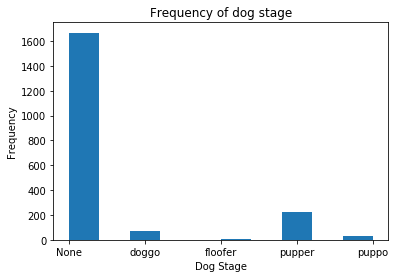

In [66]:
plt.hist(twitter_archive.dog_stage)
plt.xlabel('Dog Stage')
plt.ylabel('Frequency')
plt.title('Frequency of dog stage');

##### From the graph, the most common dog stage is popper which is 1668, after that is doggo which is 72, and poppo is 28, last is floofer which is only 3. 

### Which dog stage has highest rating? 

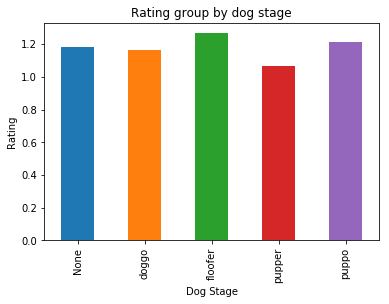

In [67]:
z = twitter_archive.groupby(['dog_stage']).rating.mean().plot(kind='bar',title = 'Rating group by dog stage');
z.set_xlabel("Dog Stage");
z.set_ylabel("Rating");

##### From the graph, we could see that there is no difference between the dog satge, the highest rate is floofer. 


### What's the top 10 dogs' name? 

In [68]:
twitter_archive.name.value_counts()[1:11].sort_values(ascending = False)

Charlie    11
Cooper     10
Lucy       10
Oliver     10
Tucker      9
Penny       9
Winston     8
Sadie       8
Daisy       7
Toby        7
Name: name, dtype: int64

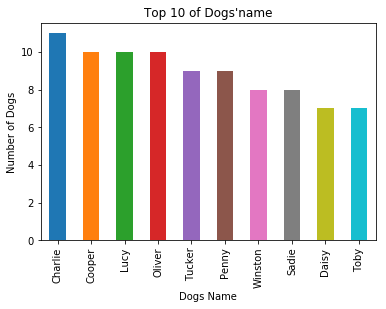

In [69]:
twitter_archive.name.value_counts()[1:11].sort_values(ascending = False).plot(kind='bar')
plt.xlabel('Dogs Name')
plt.ylabel('Number of Dogs')
plt.title("Top 10 of Dogs'name");

###### Expect dogs do not have a name, the most common dog's name is Charlie, there are 11 dogs have the name, Charlie. There are 10 dogs called Lucy, Oliver and Cooper. The name of Tucker and Penny both have 9 counts. There are 8 dogs called Sadie and Winston. The last place of top 10 names is Daisy and Lola, which has 7 dogs called that name.


### What's the relationship between retweet count and favorite count? 

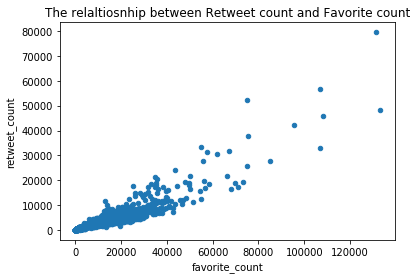

In [70]:
twitter_archive.plot(x='favorite_count',y='retweet_count',kind = 'scatter',
        title="The relaltiosnhip between Retweet count and Favorite count");


##### From the output, there is a positive correlation between how much a post was retweeted and favorite counts, the more favorite count, the more retweet count. 

### Which month has most retweet and like?

In [71]:
twitter_archive.timestamp = pd.to_datetime(twitter_archive.timestamp)
twitter_archive['month'] = pd.DatetimeIndex(twitter_archive['timestamp']).month
#Convert month to int
twitter_archive.month.astype(int);

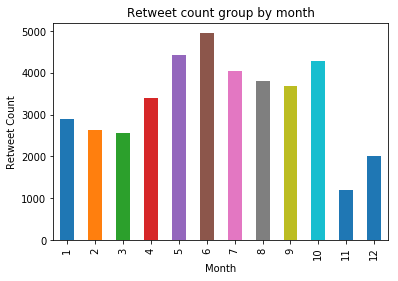

In [72]:
x = twitter_archive.groupby(['month']).retweet_count.mean().plot(kind='bar',title = 'Retweet count group by month');
x.set_xlabel("Month");
x.set_ylabel("Retweet Count");

In [73]:
twitter_archive.groupby(['month']).retweet_count.mean()

month
1     2890.612766
2     2631.765714
3     2554.708333
4     3399.494737
5     4418.320000
6     4951.056000
7     4051.255474
8     3803.393443
9     3687.285714
10    4274.276923
11    1196.636103
12    2017.610451
Name: retweet_count, dtype: float64

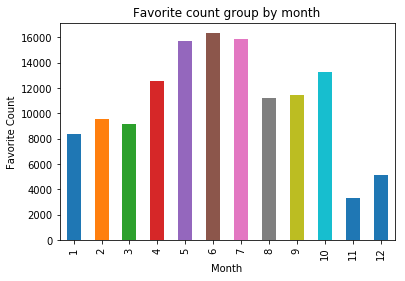

In [74]:
y = twitter_archive.groupby(['month']).favorite_count.mean().plot(kind='bar',title = 'Favorite count group by month');
y.set_xlabel("Month");
y.set_ylabel("Favorite Count");

In [75]:
twitter_archive.groupby(['month']).favorite_count.mean()

month
1      8389.702128
2      9556.234286
3      9141.404762
4     12534.168421
5     15722.570000
6     16341.232000
7     15858.138686
8     11170.901639
9     11435.476190
10    13294.169231
11     3289.808023
12     5145.021378
Name: favorite_count, dtype: float64

##### From the output, people most frequently retweet and give a like for a post in May and June. The post retweet in May has 4418.32 times, and 4951.056 times in June. People give a like for a post in May is Favourite count is 15722.57 times and 16341.232 times in June. Compare retweet and favourite count, people would more likely save a post as favourite, rather than retweet it.

<a id='REF'></a>
### Part V - References

https://stackoverflow.com/questions/7370801/how-to-measure-elapsed-time-in-python
https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/    
https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
https://stackoverflow.com/questions/50624412/how-to-create-a-new-pandas-column-by-splitting-an-existing-one
https://stackoverflow.com/questions/28986489/how-to-replace-text-in-a-column-of-a-pandas-dataframe    
https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns   
    
    
    